<a href="https://colab.research.google.com/github/vanshika-poojari/Blurry-image/blob/main/PredictiveAnalysis_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#dataframe
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from imblearn. over_sampling import SMOTE


#Classification Algorithms
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing data set
df = pd.read_csv('/content/income_census.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


  EDA

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
stripped_columns = []
for item in list(df.columns):
  item = item.strip()
  stripped_columns.append(item)

#replace column names with stripped columns
df.columns = stripped_columns

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
df.shape

(32561, 15)

In [ ]:
#removing the dash and adding underscore for coloumn names

columns = list(df.columns)
adder = ""
new_columns = []
for each_column in columns:
  for letter in each_column:
    if letter == ".":
      adder = adder + "_"
    else:
      adder = adder + letter
  new_columns.append(adder)
  adder = ""

new_columns


['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [ ]:
df.columns = new_columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
#mode of each categorical column
def mode(list_of_nums):
  average = list_of_nums.mode()
  return average

categorical_var = list(df.select_dtypes(include=object).columns)
for item in categorical_var:
  print(item + " mode: " + mode(df[item]))

0    workclass mode: Private
Name: workclass, dtype: object
0    education mode: HS-grad
Name: education, dtype: object
0    marital_status mode: Married-civ-spouse
Name: marital_status, dtype: object
0    occupation mode: Prof-specialty
Name: occupation, dtype: object
0    relationship mode: Husband
Name: relationship, dtype: object
0    race mode: White
Name: race, dtype: object
0    sex mode: Male
Name: sex, dtype: object
0    native_country mode: United-States
Name: native_country, dtype: object
0    income mode: <=50K
Name: income, dtype: object


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
#values/categories for each column
catagorical_var = list(df.select_dtypes(include=object).columns)
for item in catagorical_var:
  print(item + ":")
  print(df[item].unique())

workclass:
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education:
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
marital_status:
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation:
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship:
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
race:
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
sex:
['Female' 'Male']
native_country:
['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&T

In [ ]:
#removing question mark with unknown
df['workclass'].replace('?', 'Unknown', inplace=True)
df['occupation'].replace('?','unkown', inplace=True)
df['native_country'].replace('?','unknown', inplace=True)

DATA VISUALIZATION

In [ ]:
#list of categorical or numerical values
categorical_var = list(df.select_dtypes(include=object).columns)
numerical_var = list(df.select_dtypes(exclude=object).columns)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, '\nWorkclass Type')

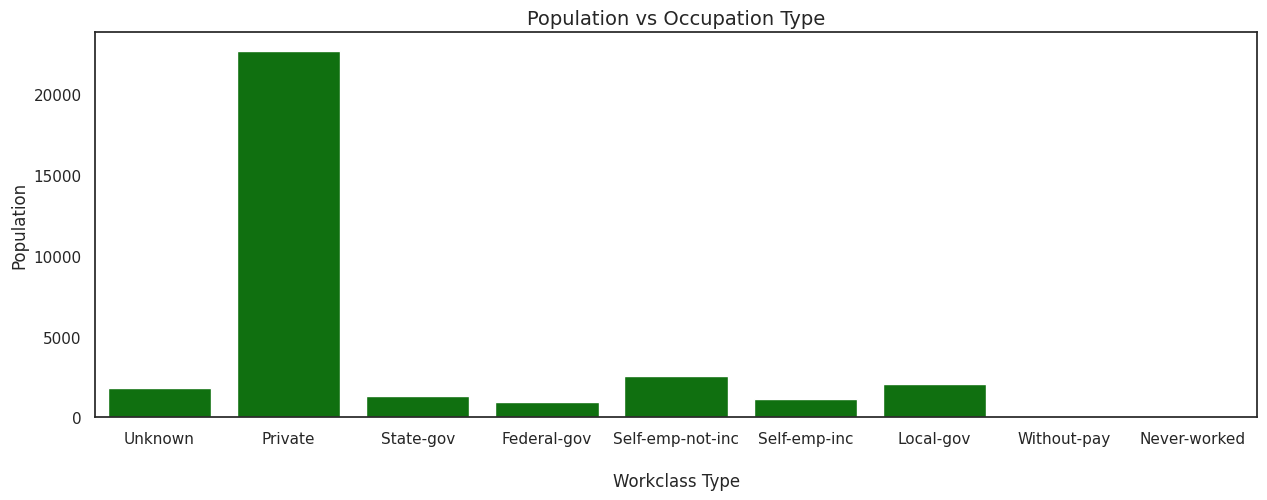

In [ ]:
plt.figure(figsize=(15,5))
sns.set(style = 'white')
sns.countplot(x='workclass', data=df, color ='green')
plt.title('Population vs Occupation Type', size = 14)
plt.ylabel('Population')
plt.xlabel('\nWorkclass Type')



Text(0.5, 0, '\nEducation Level')

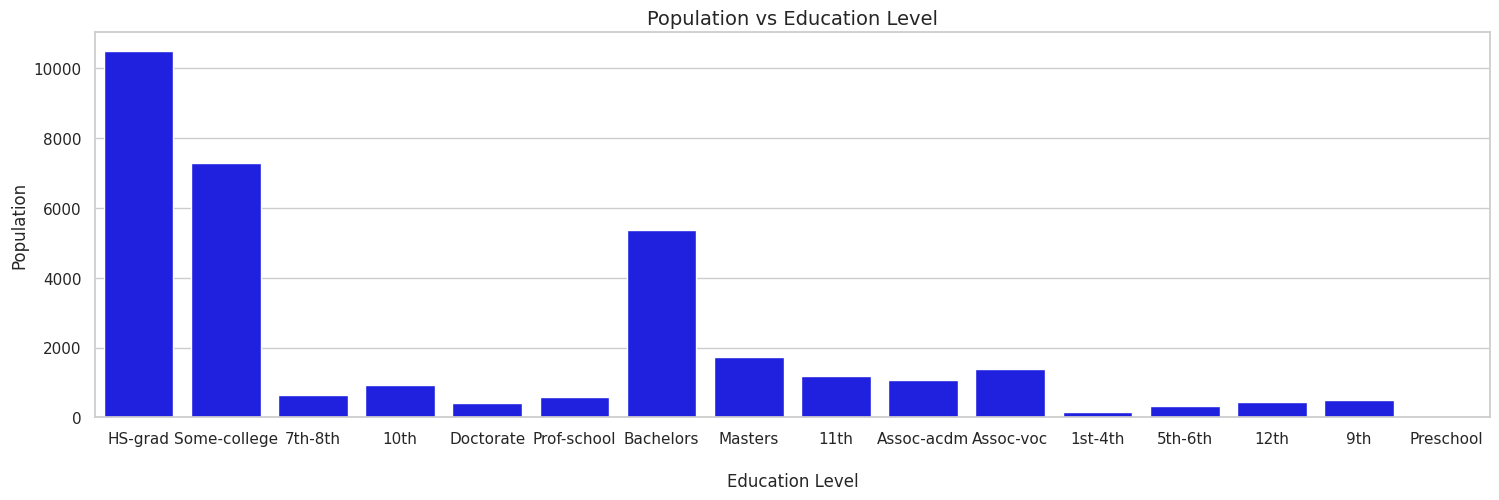

In [ ]:
plt.figure(figsize=(18,5))
sns.set(style='whitegrid')
sns.countplot(x='education' ,data=df, color='blue')
plt.title('Population vs Education Level' , size=14)
plt.ylabel('Population')
plt.xlabel('\nEducation Level')

The bar plot shows how most students are high school graduate followed by a majority of college students and bachelors.

<Axes: xlabel='education', ylabel='count'>

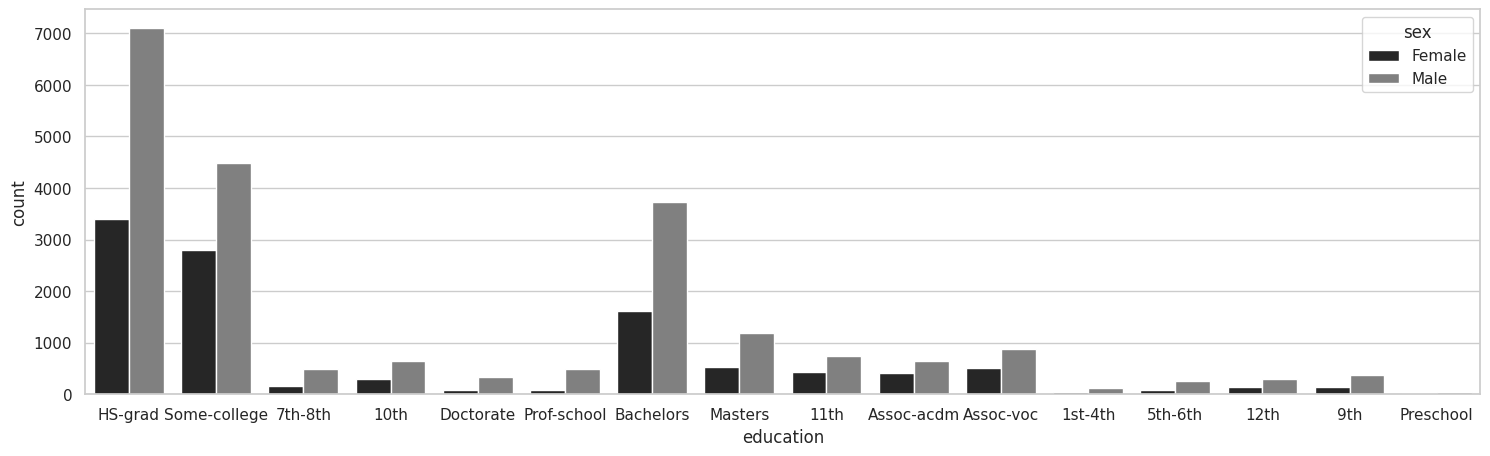

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(x="education", data=df, hue="sex", color="grey")

Showing data for count based on education level and also the ratio of female  to men for each education category


<Axes: xlabel='marital_status', ylabel='count'>

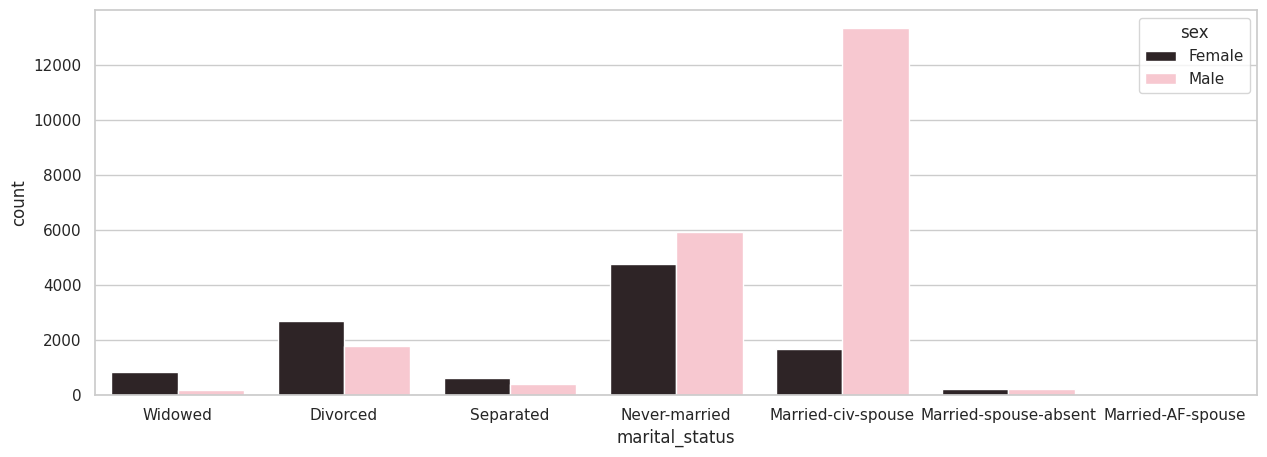

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="marital_status", data=df,hue="sex", color = "pink")

<Axes: xlabel='income', ylabel='count'>

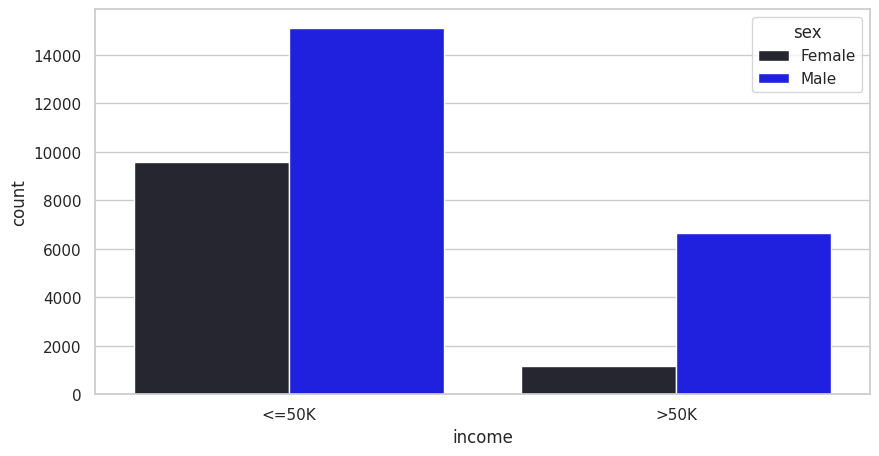

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = "income", data = df, hue = "sex",color = "blue")

<function matplotlib.pyplot.show(close=None, block=None)>

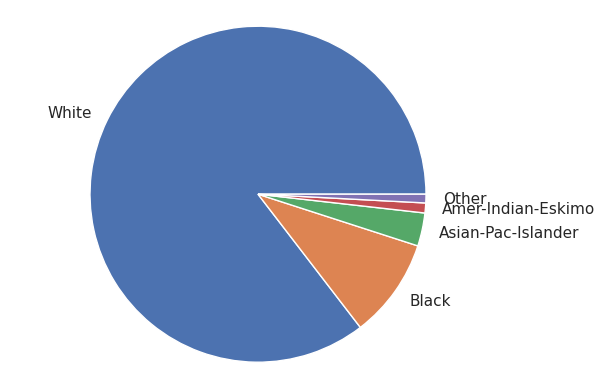

In [ ]:
fig1, ax1 = plt.subplots()
x = list(df['race'].value_counts().index)
y = list(df['race'].value_counts().values)
ax1.pie(y,labels=x)
ax1.axis('equal')
plt.show

Visualization of numerical values

Text(0.5, 1.0, 'Histogram for ages')

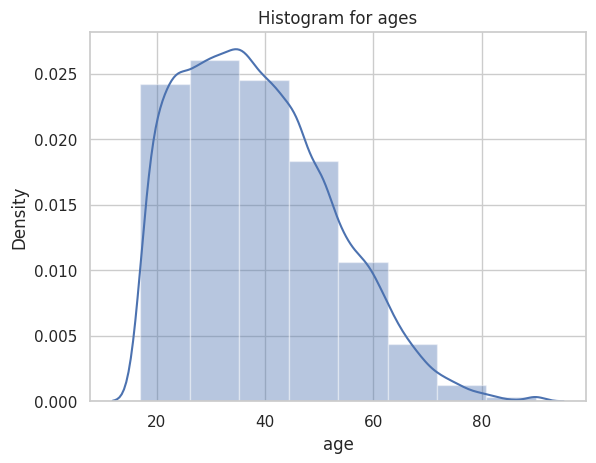

In [ ]:
#histogram
sns.distplot(df['age'], bins = 8)
plt.title("Histogram for ages")

Text(0.5, 1.0, 'Age vs Income')

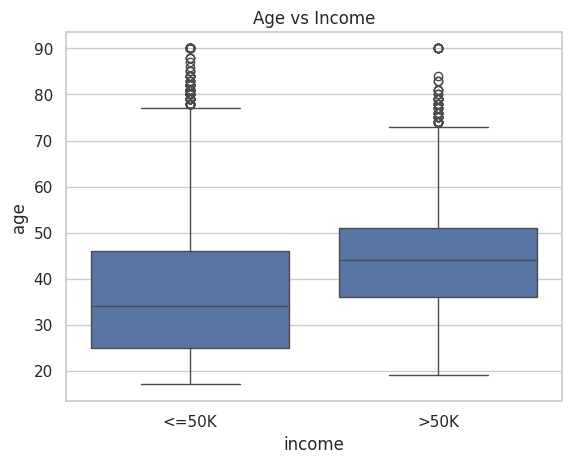

In [ ]:
#boxplot of age vs income
sns.boxplot(x = df['income'], y = df['age'], color = 'b')
plt.title("Age vs Income")


<Axes: xlabel='race', ylabel='age'>

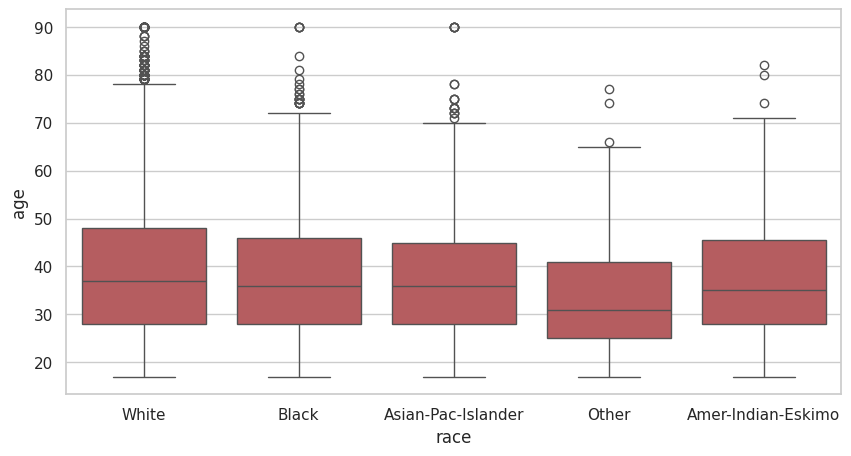

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['race'], y=df['age'], color = 'r')

Text(0.5, 1.0, 'Relationship between Marital status and age')

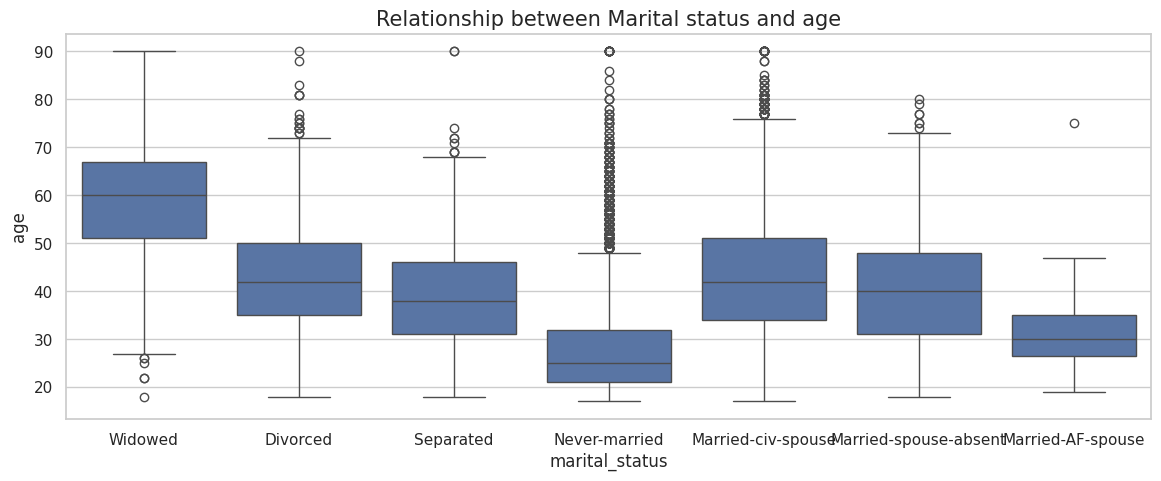

In [ ]:
plt.figure(figsize=(14,5))
sns.boxplot(x = df['marital_status'], y = df['age'], color = 'b' )
plt.title("Relationship between Marital status and age",size = 15)

Text(0.5, 1.0, 'Relationship between Age and Hours worked per week')

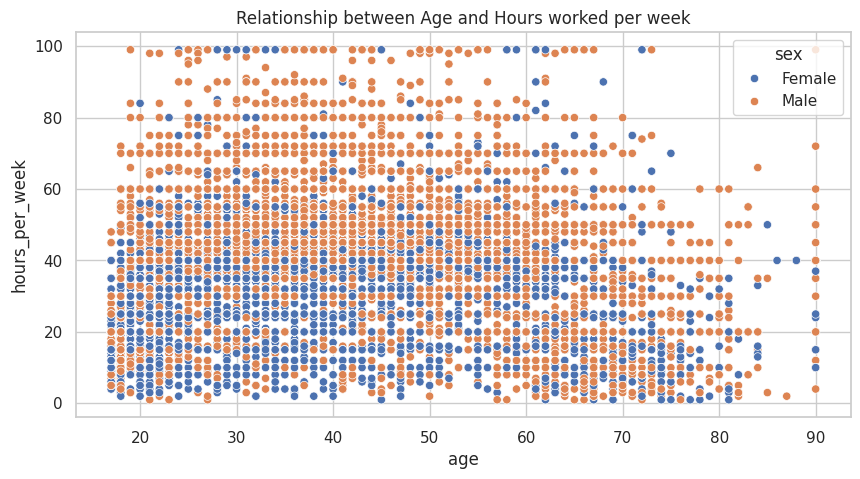

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x ='age', y = "hours_per_week", hue = "sex", color = 'r', data=df)
plt.title("Relationship between Age and Hours worked per week")

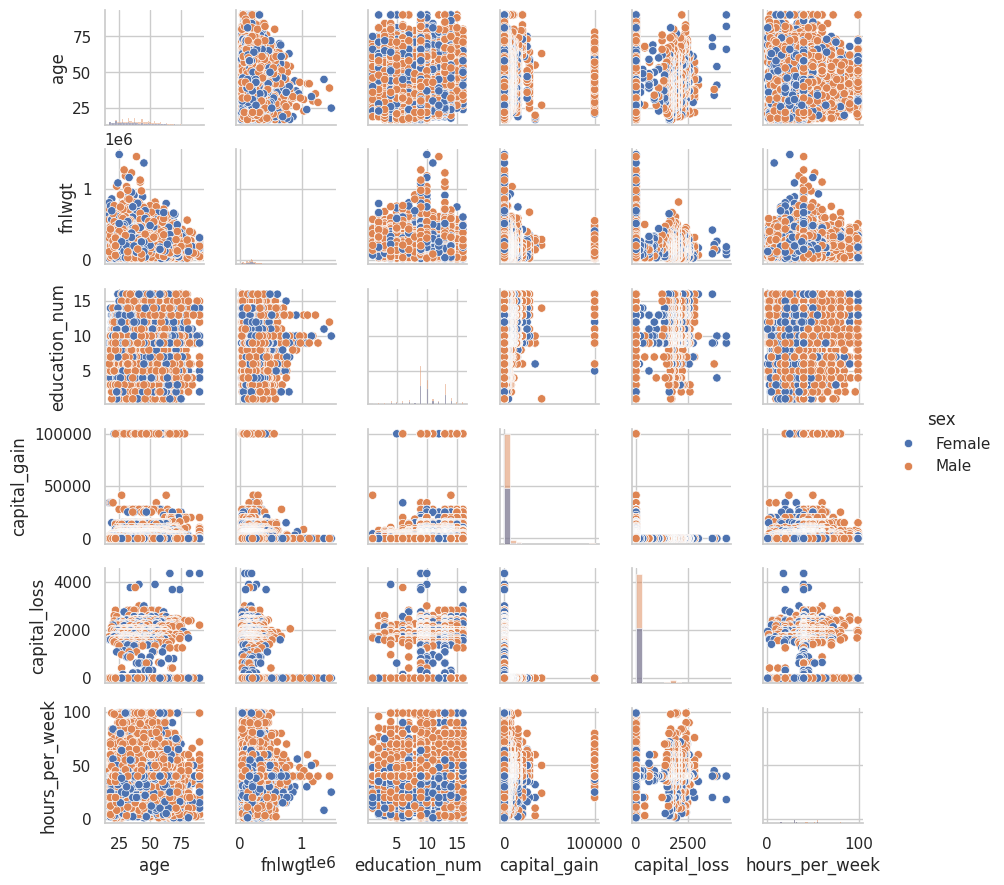

In [ ]:
#pair plot relationship between all quantitative variables
sns.pairplot(df, height = 1.5, hue = "sex", diag_kind = "hist")

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Unknown,77053,HS-grad,9,Widowed,unkown,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Unknown,186061,Some-college,10,Widowed,unkown,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
